In [1]:
# pip install bitarray 
from bitarray import bitarray

# pip install mmh3  --> for murmur hash function
import mmh3
import matplotlib.pyplot as plt

In [2]:
# import input_taker  
from input_taker import *
# from input_taker import input_taking_with_different_no_of_hash
from ip_generator import *

from plotter import *

# BloomFilter Class

In [3]:
# bloom filter class
class BloomFilter:
    def __init__(self, size, no_of_hash, multiplier):
        self.size = size
        self.multiplier = multiplier
        self.m = int(self.size * multiplier)
        self.filter = bitarray(self.m)
        self.filter.setall(0) 
        self.no_of_hash = no_of_hash
        self.seeds = [i * 31 + 7 for i in range(no_of_hash)] # prime no helps to take a good seed value for better distribution


    def add(self, ip):
        for i in range(0,self.no_of_hash):
            hash_value = mmh3.hash(ip, seed=self.seeds[i]) & 0x7FFFFFFF  # Ensures positive hash values
            self.filter[hash_value % self.m] = True




    def exists(self, ip):
        for i in range(self.no_of_hash):
            hash_value = mmh3.hash(ip, seed=self.seeds[i]) & 0x7FFFFFFF 
            if not self.filter[hash_value % self.m]:
                return False
        return True

<span style="background-color:rgb(235, 235, 235); padding: 6px; font-size: 30px; font-weight: bold;">Main Method</span> 

In [4]:
if __name__ == "__main__":

    #input taking 
    sz, no_of_hash, multiplier = inputTaking()

    # Generate a file named "ip_addresses.txt" with sz no of random IPs
    generate_ip_file("ip_addresses.txt", sz)

    print()
    print(f"Value Entered >>>\nSize of array : {sz} \nNumber of hash functions: {no_of_hash}\nMultiplier: {multiplier}")
    print()

    filter_bloom1 = BloomFilter(sz, no_of_hash, multiplier)

    # Reading IP addresses from file "ip_addresses.txt"
    ip_addresses = read_ip_file("ip_addresses.txt")

    # adding first half of the IP addresses in the bloom filter then check for all 
    trained_cnt = 0
    for ip in ip_addresses[:len(ip_addresses) // 2]:  
        filter_bloom1.add(ip)
        trained_cnt += 1

    
    cnt_true = 0 # will count no of true bloom filter is saying 
    for ip in ip_addresses:
        if filter_bloom1.exists(ip) == True:
            cnt_true += 1
    
    false_positive = 0
    if len(ip_addresses) != trained_cnt:
        false_positive = (cnt_true - trained_cnt) / (len(ip_addresses) - trained_cnt)

    print(f"False positive rate: {false_positive:.2%}")     


Value Entered >>>
Size of array : 200000 
Number of hash functions: 7
Multiplier: 5

False positive rate: 0.82%


<span style="background-color: lightgrey; padding: 6px; font-size: 27px; font-weight: bold;">false_positive &nbsp; V/S &nbsp; no_of_hash_used</span>

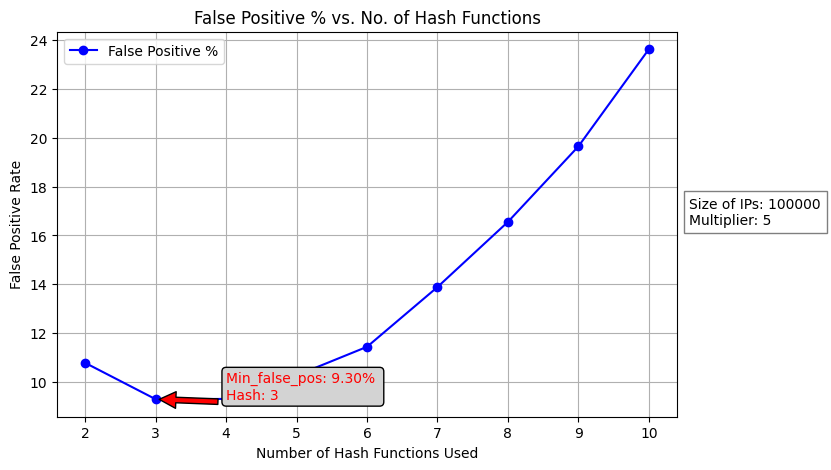

In [5]:
sz, no_of_hash, multiplier = input_taking_with_different_no_of_hash()
generate_ip_file("ip_addresses.txt", sz)
ip_addresses = read_ip_file("ip_addresses.txt")
false_positives = []


for i in range(2,no_of_hash+1):
    filter_bloom1 = BloomFilter(int(sz/2), i, multiplier)   # sz/2 as we are training with half of the data only ..
    trained_cnt = 0
    for ip in ip_addresses[:len(ip_addresses) // 2]:  
        filter_bloom1.add(ip)
        trained_cnt += 1

    
    cnt_true = 0 # will count no of true bloom filter is saying 
    for ip in ip_addresses:
        if filter_bloom1.exists(ip) == True:
            cnt_true += 1
    
    
    false_positive = 0

    if len(ip_addresses) != trained_cnt:
        false_positive = (cnt_true - trained_cnt)*100 / (len(ip_addresses) - trained_cnt)

    false_positives.append(false_positive)

plotGraph(no_of_hash, false_positives, sz, multiplier)


### Will use this particular formula......
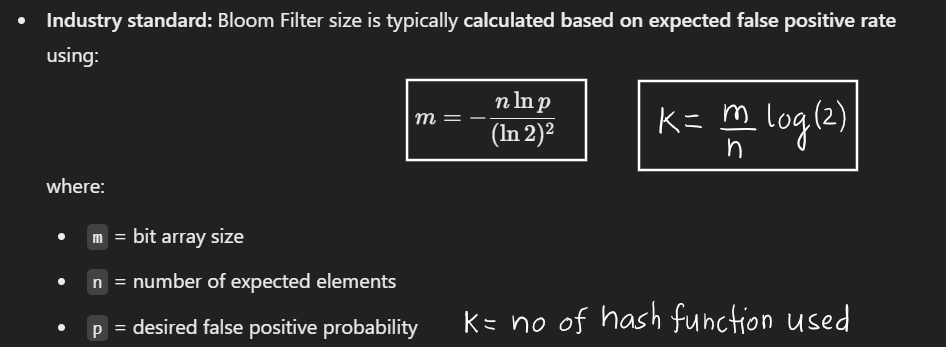

### Here We are just taking input for the size of IP_Addresses Array and taking false_positive_rate as 5% 

Taking Expected false positive rate as 5 % 
So according to formula it comes out to be 6.23 * size_of_IP_array
According to formula no_of_hash must be either 4 or 5; let's see through graph as well.


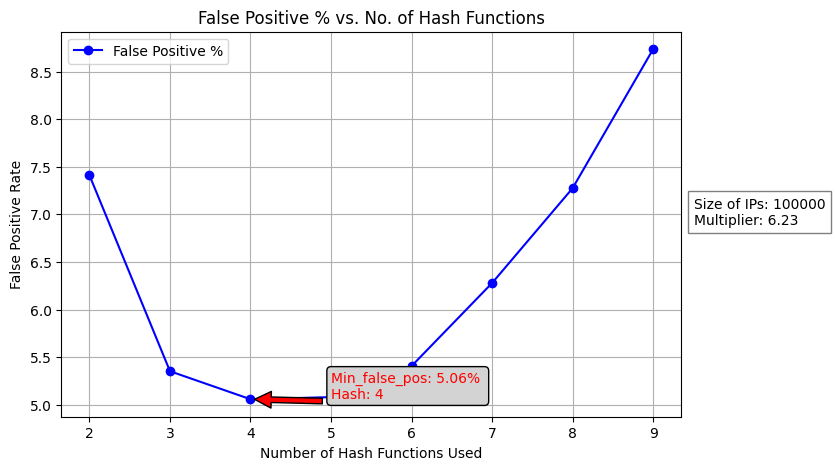

In [6]:

sz = int(input("Enter size for IP address array: "))
generate_ip_file("ip_addresses.txt", sz)
ip_addresses = read_ip_file("ip_addresses.txt")
false_positives = []

print("Taking Expected false positive rate as 5 % ");
# I have taken value of m as n * multiplier --> so multiplier is equal to   - log(p) / (ln(2)*ln(2))
multiplier = 6.23
print("So according to formula it comes out to be 6.23 * size_of_IP_array")

# Now it's turn for value of no_of_hash_used
no_of_hash = 6.23 * 0.6931
import math  # Add this at the top if not added

print(f"According to formula no_of_hash must be either {math.floor(no_of_hash)} or {math.ceil(no_of_hash)}; let's see through graph as well.")


no_of_hash = int(no_of_hash + 5)
for i in range(2,no_of_hash+1):
    filter_bloom1 = BloomFilter(int(sz/2), i, multiplier)
    trained_cnt = 0
    for ip in ip_addresses[:len(ip_addresses) // 2]:  
        filter_bloom1.add(ip)
        trained_cnt += 1

    
    cnt_true = 0 # will count no of true bloom filter is saying 
    for ip in ip_addresses:
        if filter_bloom1.exists(ip) == True:
            cnt_true += 1
    
    
    false_positive = 0

    if len(ip_addresses) != trained_cnt:
        false_positive = (cnt_true - trained_cnt)*100 / (len(ip_addresses) - trained_cnt)

    false_positives.append(false_positive)

plotGraph(no_of_hash, false_positives, sz, multiplier)


### Here We are taking Size of the IP_addresses Array as well as expected false_positive_rate like 5% or 7.5%

So according to formula size of bitset array comes out to be 7.30 time of size_of_IP_array
According to formula no_of_hash must be either 5 or 6; let's see through graph as well.


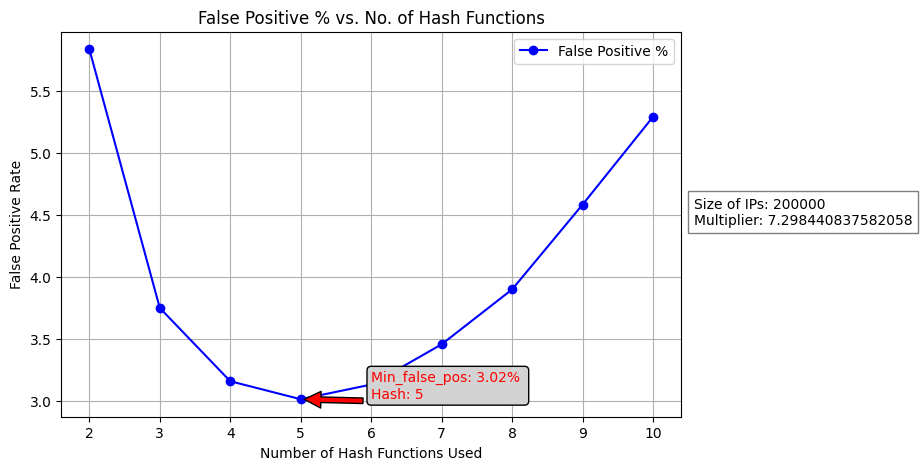

In [ ]:
sz = int(input("Enter size for IP address array: "))
generate_ip_file("ip_addresses.txt", sz)
ip_addresses = read_ip_file("ip_addresses.txt")
false_positives = []
import math  # Add this at the top if not added
false_positives_input = float(input("Enter expected false positive rates like 5 or 7.5: "))

# I have taken value of m as n * multiplier --> so multiplier is equal to   - log(false_positives_input) / (ln(2)*ln(2))
# Calculate multiplier
multiplier = -math.log(false_positives_input/100) / (math.log(2) ** 2)
print(f"So according to formula size of bitset array comes out to be {multiplier:.2f} time of size_of_IP_array")


# Now it's turn for value of no_of_hash_used
no_of_hash = multiplier * 0.6931


print(f"According to formula no_of_hash must be either {math.floor(no_of_hash)} or {math.ceil(no_of_hash)}; let's see through graph as well.")


no_of_hash = int(no_of_hash + 5)
for i in range(2,no_of_hash+1):
    filter_bloom1 = BloomFilter(int(sz/2), i, multiplier)
    trained_cnt = 0
    for ip in ip_addresses[:len(ip_addresses) // 2]:  
        filter_bloom1.add(ip)
        trained_cnt += 1

    
    cnt_true = 0 # will count no of true bloom filter is saying 
    for ip in ip_addresses:
        if filter_bloom1.exists(ip) == True:
            cnt_true += 1
    
    
    false_positive = 0

    if len(ip_addresses) != trained_cnt:
        false_positive = (cnt_true - trained_cnt)*100 / (len(ip_addresses) - trained_cnt)

    false_positives.append(false_positive)

plotGraph(no_of_hash, false_positives, sz, multiplier)
